# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# using this to generate the list of cities  below
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Initialize lists and variables for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# #for testing we are going to use a smaller set of names; drop this once the code is good
# cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# # Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Home 40.0416, 75.3699

# Save config information from  https://openweathermap.org/current#data
# Save config information
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
units = "Imperial" #metric

# Comment out after testing
#city_testing = "New York" # for testing

# Build query URL
#url = base_url + city_testing
url = base_url


#print(url)

In [4]:
# Initialize lists to loop through cities data and make api calls

# set up lists to hold reponse info
city_name = []
city_number = []
latitude = []
longitude = []
temp = []
humidity = []
wind = []
clouds = []
country = []
date = []

In [5]:
# Initialize counters for loops through multiple cities
counter = 0
set_counter = 1         
#next_counter = 0
counter_cities_analyzed = 0
#skip_counter  = 0
counter_response_errors  = 0

In [6]:
# # For testing
# counter_url_print = 1

# for city in cities[0:19]:
#     counter_url_print
#     print(str(counter_url_print) + ": " + url + city)
#     counter_url_print += 1

In [7]:
# # for testing

# u = "http://api.openweathermap.org/data/2.5/weather?appid=2126a8dfc46686055d87f1210e58a355&units=imperial&q=albany"
# weather_response = requests.get(u)
# data = weather_response.json()


In [8]:
# # For Testing
# data

In [9]:
# # For Testing
# city_name.append(data['name'])
# city_number.append(data['id'])
# lat.append(data['coord']['lat'])
# lon.append(data['coord']['lon'])
# temp.append(data['main']['temp_max'])
# humidity.append(data['main']['humidity'])
# wind.append(data['wind']['speed'])
# clouds.append(data['clouds']['all'])
# country.append(data['sys']['country'])
# date.append(data['dt'])

In [10]:
for city in cities[0:52]:
    # url_city = url + 'albany'
    url_city = url + city
    weather_response = requests.get(url_city)
    data = weather_response.json()

    try:
        #pause for 30 seconds for every 50 requests  to allow for processing
        if counter > 49: # comment out when testing
            counter = 0
            set_counter +=1
            time.sleep(30)
        
        # Read JSON and append values to lists
        city_name.append(data['name'])
        city_number.append(data['id'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        wind.append(data['wind']['speed'])
        clouds.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
            
        print(f"Processing {counter} of Set {set_counter} | {city}")

        # Increment the count for the records processed 
        counter += 1
        counter_cities_analyzed += 1

    except (KeyError, IndexError):

        #For cities without API data
        print(f"{city} not found...")
        counter_response_errors += 1

Processing 0 of Set 0 | jamestown
Processing 1 of Set 1 | ilulissat
Processing 2 of Set 2 | port elizabeth
Processing 3 of Set 3 | bethel
Processing 4 of Set 4 | port-cartier
Processing 5 of Set 5 | olafsvik
Processing 6 of Set 6 | maragogi
Processing 7 of Set 7 | reyes
Processing 8 of Set 8 | puerto ayora
Processing 9 of Set 9 | rongcheng
Processing 10 of Set 10 | hobyo
belushya guba not found.  Go to the next city...
Processing 11 of Set 11 | mana
Processing 12 of Set 12 | nouadhibou
Processing 13 of Set 13 | rikitea
Processing 14 of Set 14 | hobart
Processing 15 of Set 15 | goundam
Processing 16 of Set 16 | kodiak
Processing 17 of Set 17 | castro
Processing 18 of Set 18 | punta arenas
Processing 19 of Set 19 | asau
Processing 20 of Set 20 | busselton
Processing 21 of Set 21 | walvis bay
Processing 22 of Set 22 | gambela
Processing 23 of Set 23 | albany
galgani not found.  Go to the next city...
Processing 24 of Set 24 | airai
Processing 25 of Set 25 | maldonado
Processing 26 of Set 

In [11]:
print(url_city)

http://api.openweathermap.org/data/2.5/weather?appid=2126a8dfc46686055d87f1210e58a355&units=imperial&q=hermanus


In [12]:
#Upon completion         
print ("===================================================================================")        
print (f"Number of Citites Analyzed: {counter_cities_analyzed}")
print (f"Number of Cities Not Found: {counter_response_errors}")

Number of Citites Analyzed: 47
Number of Cities Not Found: 5


In [14]:
#Create Data Frame
city_weather = pd.DataFrame({ "City": city_name
                       , "Latitude"   : latitude
                       , "Longitude"  : longitude
                       , "Temp" : temp
                       , "Humidity"        : humidity
                       , "Clouds"  : clouds
                       , "Wind Speed"      : wind
                       , "Country"    : country
                       , "Date"   : date})

city_weather.index.name = "City_ID"

,City,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Jamestown,42.0970,-79.2353,62.19,64,0,10.36,US,1668133630
1,Ilulissat,69.2167,-51.1000,-1.68,85,100,4.88,GL,1668133631
2,Port Elizabeth,-33.9180,25.5701,64.09,91,100,18.41,ZA,1668133631
3,Bethel,41.3712,-73.4140,57.65,82,0,0.00,US,1668133622
4,Port-Cartier,50.0334,-66.8654,40.68,77,100,9.91,CA,1668133631
5,Olafsvik,64.8945,-23.7142,41.47,91,100,24.00,IS,1668133632
6,Maragogi,-9.0122,-35.2225,75.76,86,0,2.73,BR,1668133632
7,Reyes,-14.3167,-67.3833,78.89,70,98,4.68,BO,1668133632
8,Puerto Ayora,-0.7393,-90.3518,68.56,89,75,5.01,EC,1668133632


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Export to .csv 
output_data_file = "../output_data/cities.csv"
output_path = os.path.join(output_data_file )
city_weather.to_csv(output_path,index="False")
city_weather

,City,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Jamestown,42.0970,-79.2353,62.19,64,0,10.36,US,1668133630
1,Ilulissat,69.2167,-51.1000,-1.68,85,100,4.88,GL,1668133631
2,Port Elizabeth,-33.9180,25.5701,64.09,91,100,18.41,ZA,1668133631
3,Bethel,41.3712,-73.4140,57.65,82,0,0.00,US,1668133622
4,Port-Cartier,50.0334,-66.8654,40.68,77,100,9.91,CA,1668133631
5,Olafsvik,64.8945,-23.7142,41.47,91,100,24.00,IS,1668133632
6,Maragogi,-9.0122,-35.2225,75.76,86,0,2.73,BR,1668133632
7,Reyes,-14.3167,-67.3833,78.89,70,98,4.68,BO,1668133632
8,Puerto Ayora,-0.7393,-90.3518,68.56,89,75,5.01,EC,1668133632


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#Find cities > 100% Humidity
city_humidities = len(city_weather[(city_weather["Humidity"] > 100) ])

if city_humidities  > 0:
    print (f"city_humidities: {city_humidities}")

In [18]:
#  Get the indices of cities that have humidity over 100%.
#Select only cities with humidity less than or equal to 100
clean_city_data = city_weather.loc[ (city_weather["Humidity"] <= 100 ) , :]
len(clean_city_data)

47

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Specific Date
from datetime import date as dt

date = pd.to_datetime(clean_city_data["Date"]).dt.date
specific_date = date[0:1]

for item in specific_date:
    date_analysis = str(item)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

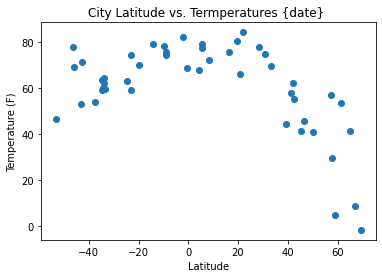

In [23]:
plt.scatter(city_weather["Latitude"], city_weather["Temperature"], marker="o")

plt.title("City Latitude vs. Termperatures")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

## Latitude vs. Humidity Plot

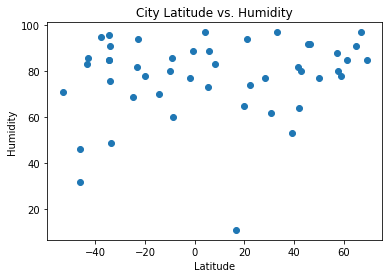

In [24]:
plt.scatter(city_weather["Latitude"], city_weather["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

## Latitude vs. Cloudiness Plot

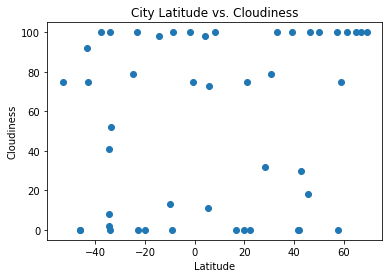

In [26]:
plt.scatter(city_weather["Latitude"], city_weather["Clouds"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

## Latitude vs. Wind Speed Plot

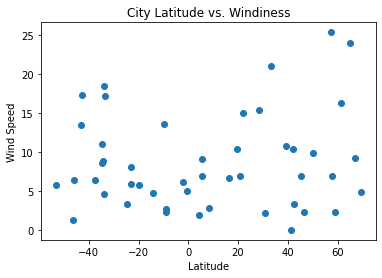

In [29]:
plt.scatter(city_weather["Latitude"], city_weather["Wind Speed"], marker="o")

plt.title("City Latitude vs. Windiness")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

## Linear Regression

In [31]:
north_df = city_weather.loc[pd.to_numeric(city_weather["Latitude"]).astype(float) > 0, :]
south_df = city_weather.loc[pd.to_numeric(city_weather["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
x_values=south_df["Latitude"]
y_values=south_df["Temperature"]
regress_values= x_values*slope+intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude Linear Regression for Southern Hemisphere")
print(f"r-value: {rvalue}")
print(f"The data shows there is a positive correlation between latitude and max temperatures")

plt.show()

NameError: name 'slope' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression